In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Trend
## Direct gradient, 5 changepoints

In [3]:
m = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)
metrics

,SmoothL1Loss,MAE,RegLoss
0,0.523019,0.767770,0.0
1,0.372094,0.616456,0.0
2,0.360981,0.608356,0.0
3,0.360646,0.607420,0.0
4,0.356163,0.602869,0.0
5,0.359085,0.605691,0.0
6,0.366711,0.613301,0.0
7,0.357704,0.603069,0.0
8,0.354580,0.599699,0.0
9,0.358252,0.603940,0.0


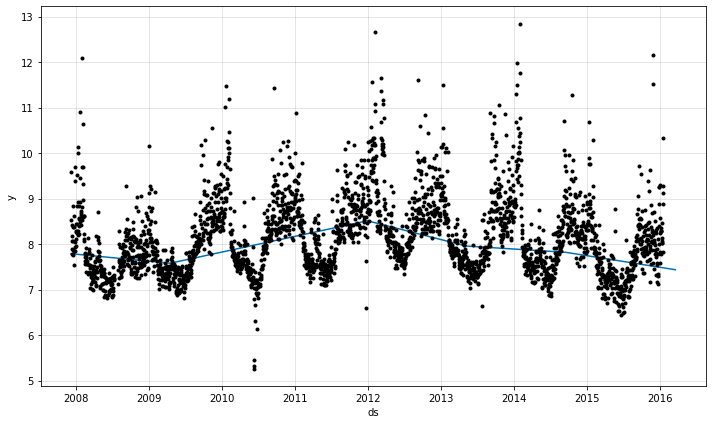

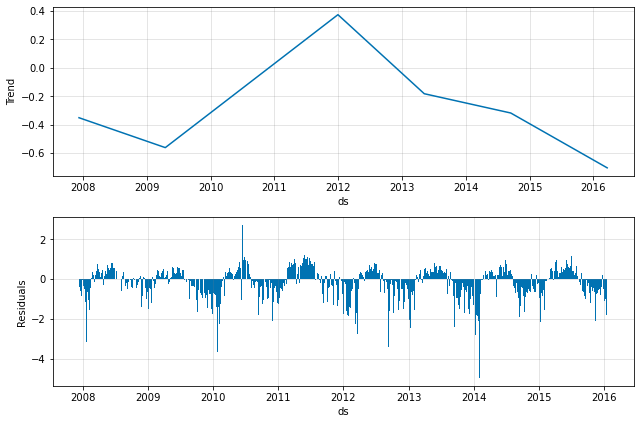

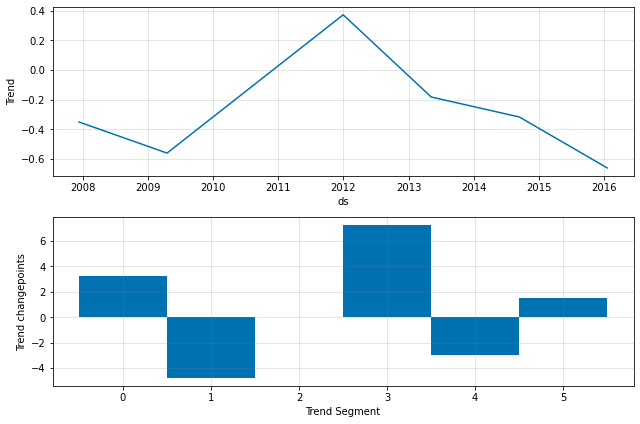

In [4]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Sparse: 2x regularized trend, 100 changepoints

In [5]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=2,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


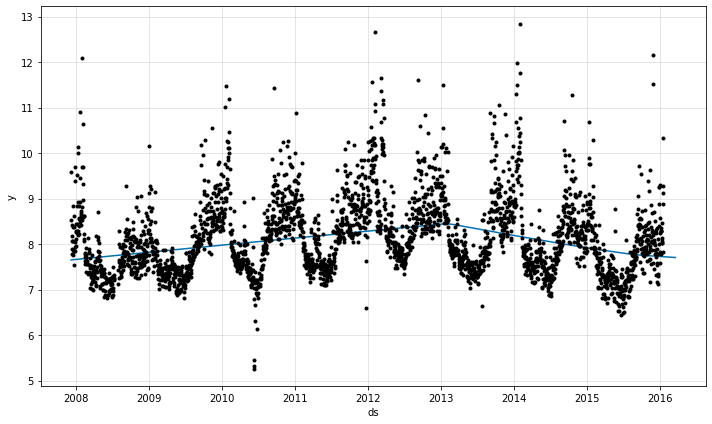

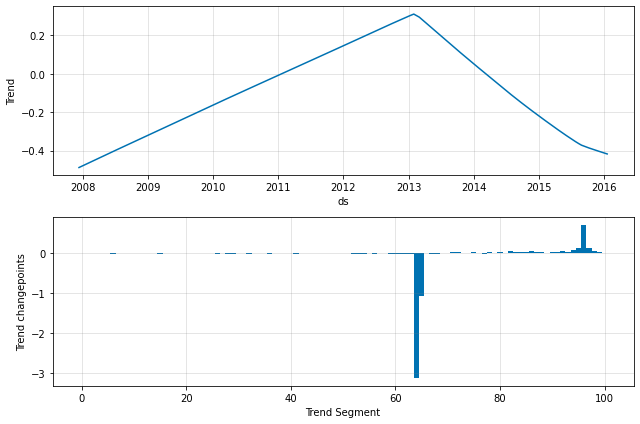

In [6]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Underfit: no changepoints

In [7]:
m = NeuralProphet(
    n_changepoints=0,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df, validate_each_epoch=True)

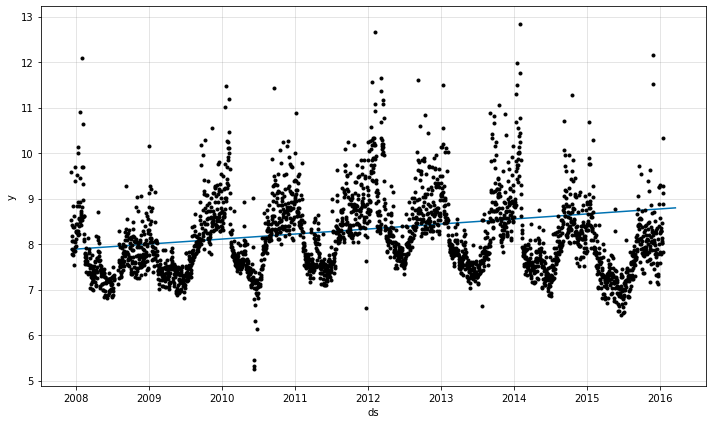

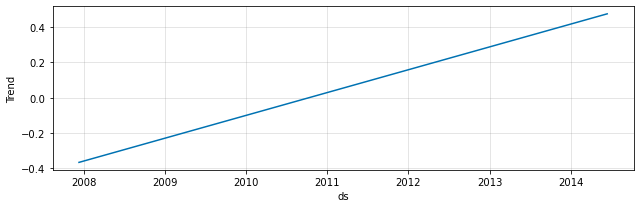

In [8]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Smooth Underfit: 10x regularized trend, 100 changepoints

In [9]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=5,
    trend_threshold=True,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


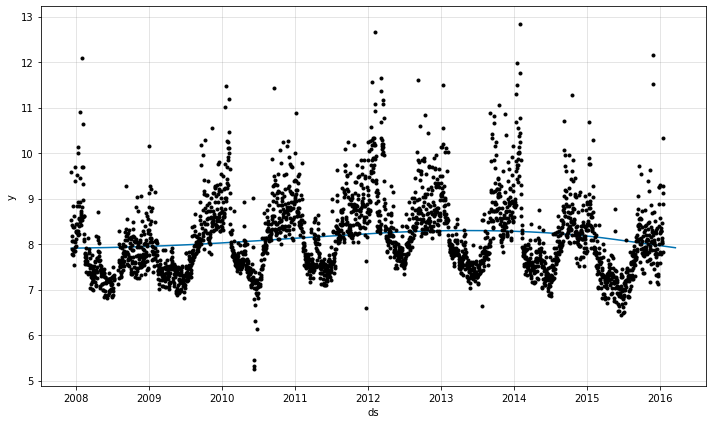

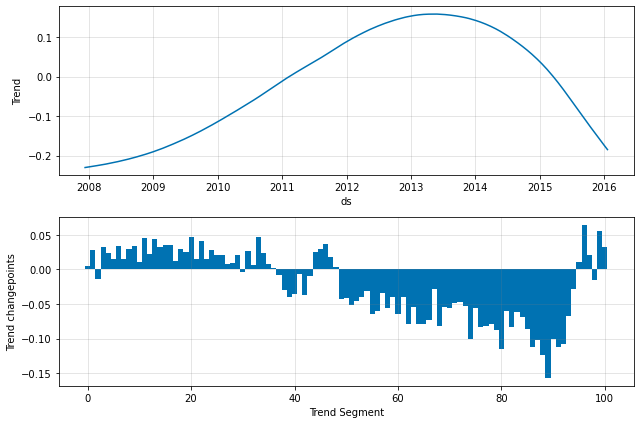

In [10]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Overfit: Direct gradient, 100 changepoints

In [11]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

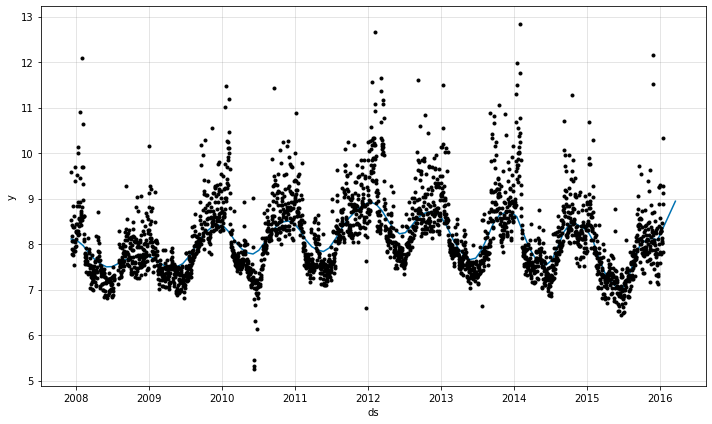

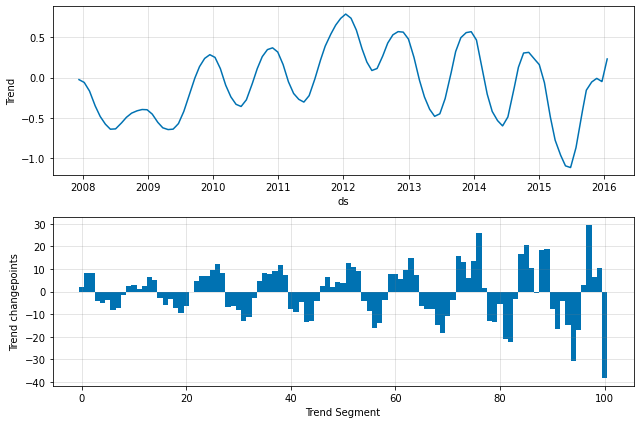

In [12]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Overfit: Direct gradient, discontinuous trend, 100 changepoints

In [13]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=-1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

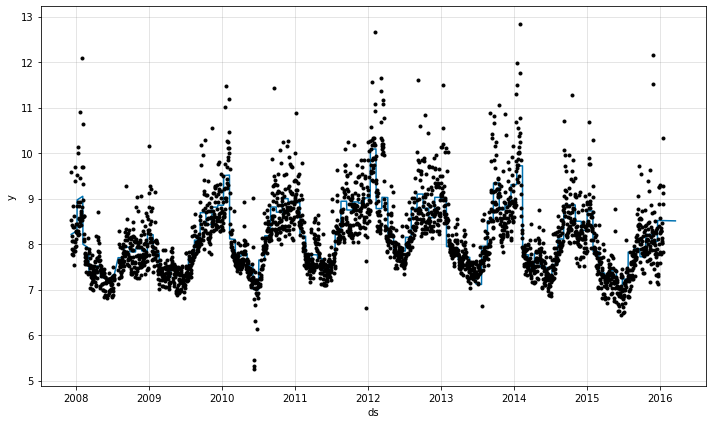

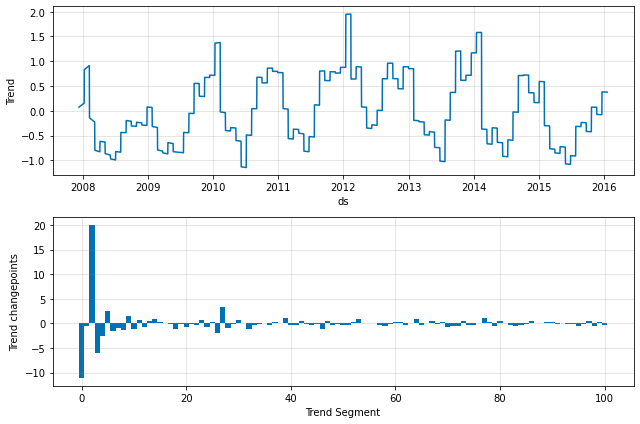

In [14]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()

## Smooth overfit: 0.1xregularized trend, 100 changepoints

In [15]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=0.1,
    trend_threshold=True,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
metrics = m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


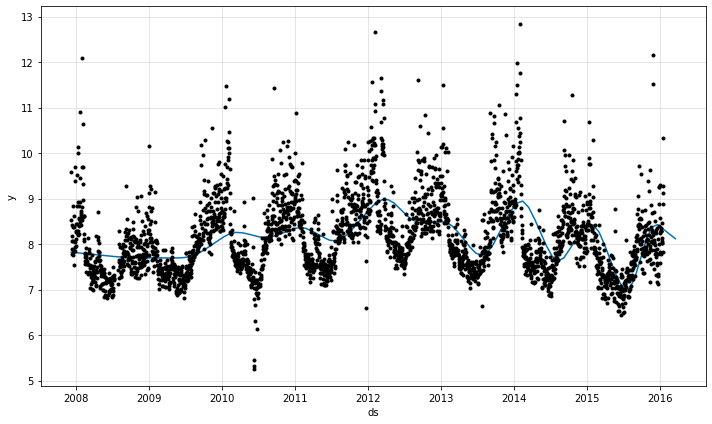

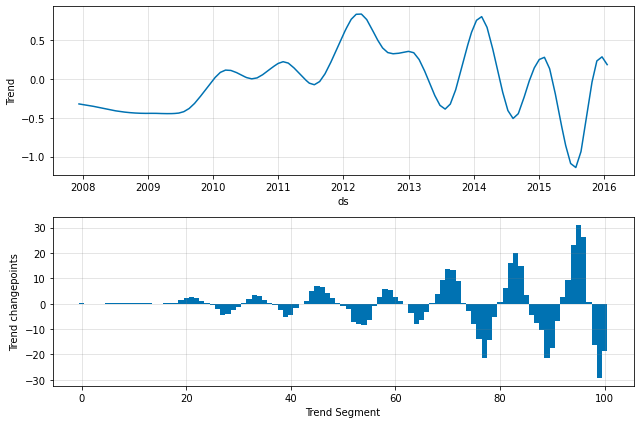

In [16]:
future = m.compose_prediction_df(df, future_periods=60, n_history=len(df))
forecast = m.predict(future)
fig_fit = m.plot(forecast)
# fig_comp = m.plot_components(forecast)
fig_param = m.plot_parameters()